<a href="https://colab.research.google.com/github/cloverbunny/mimic-iv/blob/master/c16_cleaningdata_3_31_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# setup

In [1]:
# Import libraries
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path
import seaborn as sns

# Make pandas dataframes prettier
from IPython.display import display, HTML
pd.set_option("display.max_columns", None)

# mount google drive to save files separately
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/My Drive/

/content/drive/My Drive


# cleaning

In [ ]:
pt10 = pd.read_csv("MIMIC/micu_vent_sofa_dialysis_abg_vs_ecmo3-28-22.csv")

In [ ]:
len(pt10.stay_id.unique()), len(pt10.stay_id.unique()), 

1284

In [ ]:
pt10

,stay_id,intime,outtime,los,day,day_number,max_norepi,min_map,min_gcs,min_uop,max_bili,max_cr,min_plt,max_sofa,dialysis_yn,avg_fio2,avg_peep,avg_rr,avg_tv,avg_mv,avg_platpress,min_hr,max_hr,min_rr,max_rr,min_temp,max_temp,min_spo2,avg_ph,avg_pco2,ecmo_yn,pf_ratio
0,30061692,2192-03-18 04:51:00,2192-03-21 13:55:12,3.377917,2192-03-18,1,0.200002,55.0,15.0,NaN,0.2,2.3,284.0,10.0,0.0,54.0,9.54,17.0,446.0,9.72,24.0,86.0,124.0,19.0,26.0,37.30,38.20,82.0,7.320000,41.500000,0.0,62.000000
1,30061692,2192-03-18 04:51:00,2192-03-21 13:55:12,3.377917,2192-03-19,2,0.029934,61.0,15.0,1606.779661,0.5,1.3,192.0,10.0,0.0,50.0,10.30,20.0,480.0,9.30,23.0,78.0,104.0,12.0,27.0,36.72,37.44,95.0,7.373333,37.666667,0.0,252.500000
2,30061692,2192-03-18 04:51:00,2192-03-21 13:55:12,3.377917,2192-03-20,3,0.000000,64.0,10.0,1630.000000,NaN,1.0,121.0,7.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,59.0,99.0,12.0,30.0,36.28,37.50,94.0,NaN,NaN,0.0,NaN
3,30061692,2192-03-18 04:51:00,2192-03-21 13:55:12,3.377917,2192-03-21,4,0.000000,74.0,13.0,3396.923077,NaN,0.9,134.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,74.0,95.0,14.0,33.0,36.22,37.94,92.0,NaN,NaN,0.0,NaN
4,30117582,2192-07-02 02:48:54,2192-07-14 12:33:50,12.406204,2192-07-02,1,0.251120,57.0,15.0,NaN,1.0,6.1,150.0,11.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,70.0,95.0,18.0,31.0,36.56,37.72,89.0,7.272000,47.200000,0.0,137.071429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15672,39918058,2159-06-25 16:26:17,2159-07-24 20:49:26,29.182743,2159-07-20,26,0.077368,54.0,15.0,NaN,NaN,2.7,80.0,8.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,79.0,120.0,11.0,29.0,36.83,37.44,92.0,NaN,NaN,0.0,NaN
15673,39918058,2159-06-25 16:26:17,2159-07-24 20:49:26,29.182743,2159-07-21,27,0.069556,56.0,15.0,NaN,NaN,3.1,83.0,7.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,88.0,121.0,12.0,29.0,36.56,37.17,92.0,NaN,NaN,0.0,NaN
15674,39918058,2159-06-25 16:26:17,2159-07-24 20:49:26,29.182743,2159-07-22,28,0.000000,63.0,12.0,NaN,NaN,2.6,74.0,9.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,76.0,107.0,11.0,25.0,36.56,36.94,93.0,NaN,NaN,0.0,NaN
15675,39918058,2159-06-25 16:26:17,2159-07-24 20:49:26,29.182743,2159-07-23,29,0.000000,29.0,15.0,NaN,NaN,2.9,81.0,7.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,82.0,102.0,14.0,26.0,36.78,37.00,93.0,NaN,NaN,0.0,NaN


In [ ]:
pt10 = pt10.drop(columns=['Unnamed: 0'])

In [ ]:
# merge pf vent/nonvent  columns

# check for outliers 

# fill in 0 for NA max norepi as if not documented was likely 0
# impute 0 for NA dialysis values as table only takes those with dialysis (confirmed dialysis table only takes those with some kind of dialysis present)
# impute 0 for NA ecmo days as only pulled days with ECMO documentation 

#normalize 0-1
#cluster 

In [ ]:
pt10 = pt10.drop(columns=['max_epi'])# drop max_epi column as rarely used

In [ ]:
pt10 = pt10.drop(columns=['hadm_id', 'subject_id_x'])

In [ ]:
pt10 = pt10.drop(columns=['vent_yn'])

In [ ]:
pt10['pf_ratio'] = pt10[['pf_novent','pf_vent']].mean(axis=1)

In [ ]:
pt10 = pt10.drop(columns=['pf_novent','pf_vent'])

In [ ]:
pt10.columns

Index(['stay_id', 'intime', 'outtime', 'los', 'day', 'day_number',
       'max_norepi', 'min_map', 'min_gcs', 'min_uop', 'max_bili', 'max_cr',
       'min_plt', 'max_sofa', 'dialysis_yn', 'avg_fio2', 'avg_peep', 'avg_rr',
       'avg_tv', 'avg_mv', 'avg_platpress', 'min_hr', 'max_hr', 'min_rr',
       'max_rr', 'min_temp', 'max_temp', 'min_spo2', 'avg_ph', 'avg_pco2',
       'ecmo_yn', 'pf_ratio'],
      dtype='object')

In [ ]:
pt10.dtypes

stay_id            int64
intime            object
outtime           object
los              float64
day               object
day_number         int64
vent_yn            int64
pf_novent        float64
pf_vent          float64
max_norepi       float64
min_map          float64
min_gcs          float64
min_uop          float64
max_bili         float64
max_cr           float64
min_plt          float64
max_sofa         float64
dialysis_yn      float64
avg_fio2         float64
avg_peep         float64
avg_rr           float64
avg_tv           float64
avg_mv           float64
avg_platpress    float64
min_hr           float64
max_hr           float64
min_rr           float64
max_rr           float64
min_temp         float64
max_temp         float64
min_spo2         float64
avg_ph           float64
avg_pco2         float64
ecmo_yn          float64
dtype: object

In [ ]:
pt10['max_norepi']=pt10['max_norepi'].fillna(0)

In [ ]:
pt10['ecmo_yn']=pt10['ecmo_yn'].fillna(0)

In [ ]:
pt10['dialysis_yn']=pt10['dialysis_yn'].fillna(0)

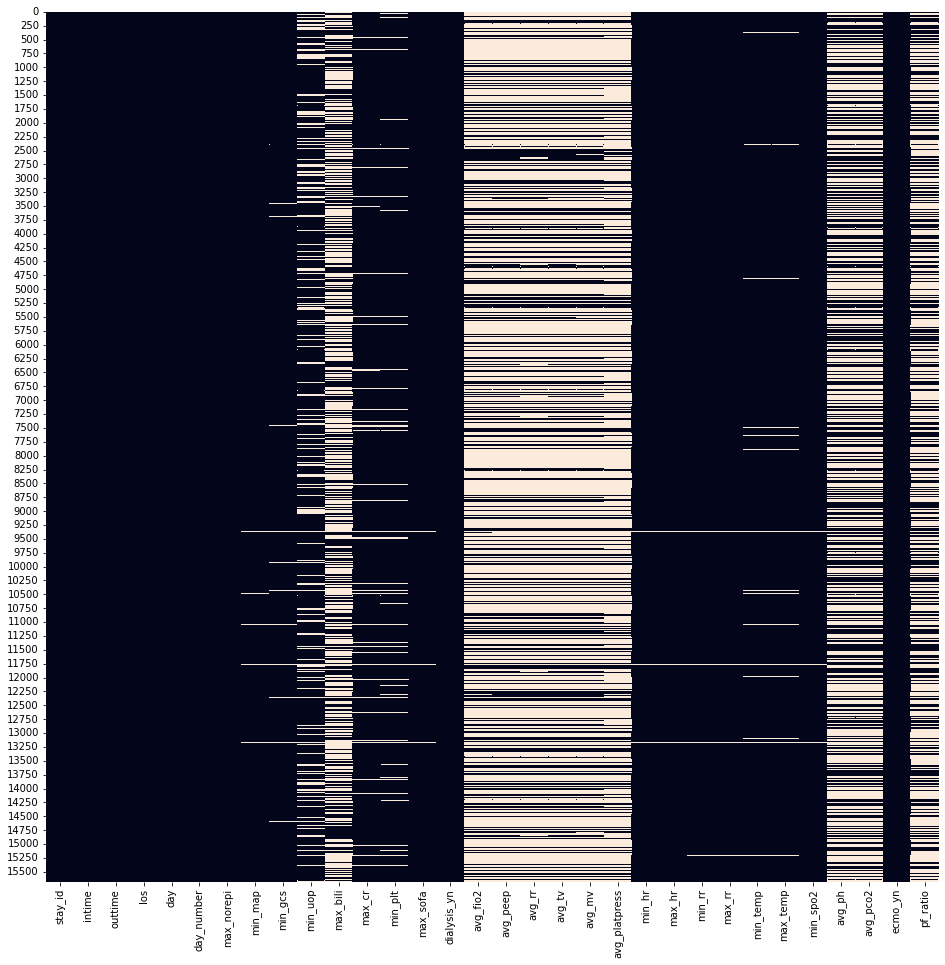

In [ ]:
fig, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(
    pt10.isna(),
    cbar=False,
    yticklabels=250,
)

In [41]:
columns_to_curate = [
    'max_norepi', 'min_map', 'min_gcs', 'min_uop', 'max_bili', 'max_cr',
       'min_plt', 'max_sofa', 'dialysis_yn', 'avg_fio2', 'avg_peep', 'avg_rr',
       'avg_tv', 'avg_mv', 'avg_platpress', 'min_hr', 'max_hr', 'min_rr',
       'max_rr', 'min_temp', 'max_temp', 'min_spo2', 'avg_ph', 'avg_pco2',
       'ecmo_yn', 'pf_ratio'
]

In [ ]:
data = pt10

In [ ]:
data.to_csv("MIMIC/data3-29-22.csv")

# examine ranges

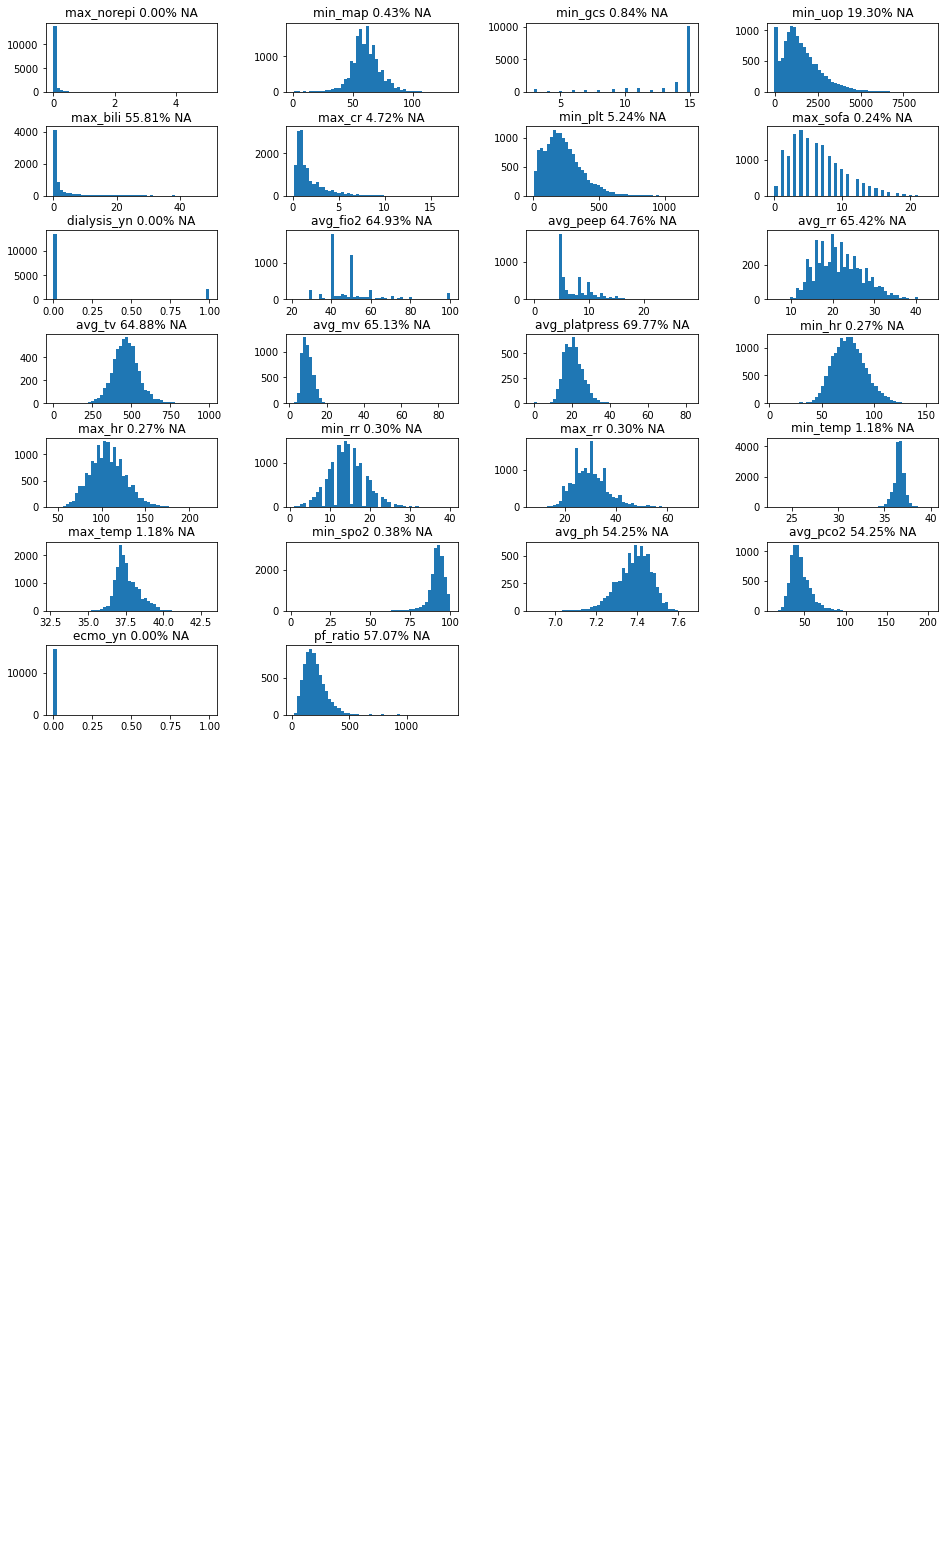

In [ ]:
columns = np.array(columns_to_curate)
cols = np.pad(columns, (0, 60 - columns.size), constant_values=np.nan).reshape(15, 4)
fig, axes = plt.subplots(
    nrows=cols.shape[0], 
    ncols=cols.shape[1], 
    figsize=(16, 28), 
    gridspec_kw={"wspace": 0.4, "hspace": 0.5}
)
for row in range(axes.shape[0]):
    for col in range(axes.shape[1]):
        column = cols[row, col]
        ax = axes[row, col]
        if isinstance(column, str) and column in data:
            ax.hist(
                data[column], 
                bins=50,
#                 log=True
            )
            ax.set_title(column + f" {data[column].isna().sum() * 100 / data.shape[0]:.2f}% NA")
        else:
            ax.tick_params(
                axis='both', which='both',
                bottom=None, top=None,
                labelbottom=None,
                left=None, right=None,
                labelleft=None
            )
            for i in ["top", "left", "right", "bottom"]:
                ax.spines[i].set_visible(False)

In [4]:
data = pd.read_csv("MIMIC/data3-29-22.csv")

In [ ]:
allowed_range = {
    "max_norepi": (0, 2),
    "min_map": (30, 120),

    "max_bili": (0, 40),
    "min_gcs": (0, 15),
    "min_plt": (0, 1200),
    "min_uop": (0, 8000),
    "max_cr": (0, 12),

    "avg_peep": (0, 25),
    "avg_platpress": (5, 50),
    "avg_rr": (0, 50),
    
    "avg_pco2": (10, 150),
    "max_temp": (30, 50),
    
    "max_hr": (30, 200),
    "min_spo2": (50, 100),
    "pf_ratio": (0, 1000),
}


In [ ]:
for column in data.columns:
    for c, ranges in allowed_range.items():
        if column == c:
            break
        if c in column:
            break
    if c != column and c not in column:
        continue
    n_val = ((data[column] < ranges[0]) | (data[column] > ranges[1])).sum()
    data.loc[(data[column] < ranges[0]) | (data[column] > ranges[1]), column] = np.nan
    print(f"# of values outside of range {ranges} for {column} = {n_val}")

# of values outside of range (0, 2) for max_norepi = 7
# of values outside of range (30, 120) for min_map = 207
# of values outside of range (0, 15) for min_gcs = 0
# of values outside of range (0, 8000) for min_uop = 6
# of values outside of range (0, 40) for max_bili = 14
# of values outside of range (0, 12) for max_cr = 20
# of values outside of range (0, 1200) for min_plt = 0
# of values outside of range (0, 25) for avg_peep = 14
# of values outside of range (0, 50) for avg_rr = 0
# of values outside of range (5, 50) for avg_platpress = 14
# of values outside of range (30, 200) for max_hr = 5
# of values outside of range (30, 50) for max_temp = 0
# of values outside of range (50, 100) for min_spo2 = 46
# of values outside of range (10, 150) for avg_pco2 = 1
# of values outside of range (0, 1000) for pf_ratio = 6


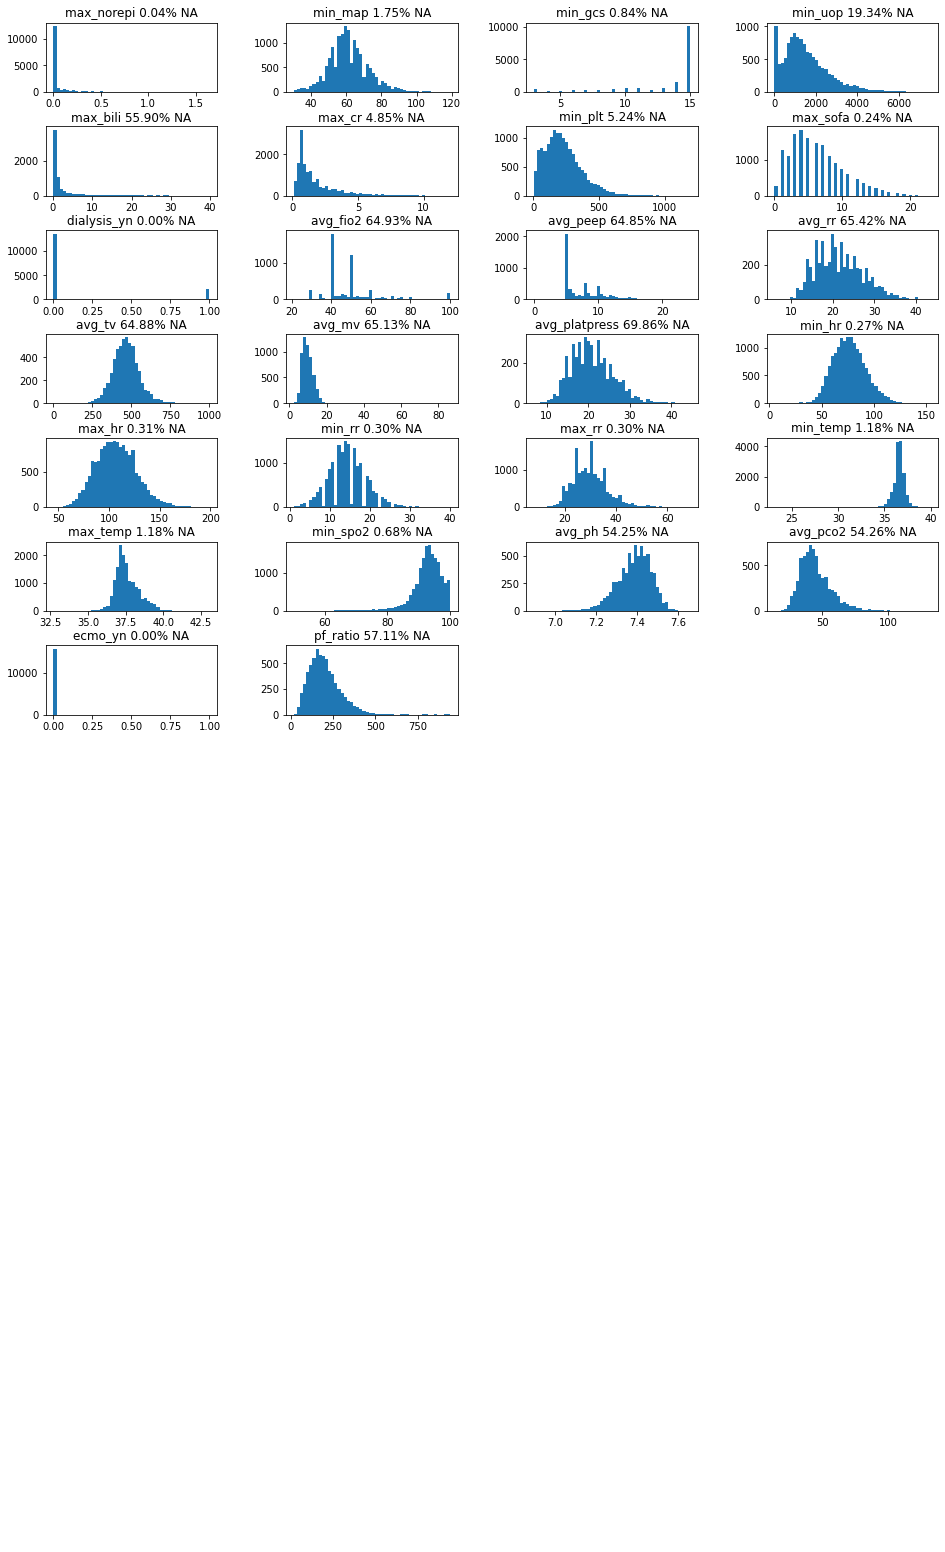

In [ ]:
columns = np.array(columns_to_curate)
cols = np.pad(columns, (0, 60 - columns.size), constant_values=np.nan).reshape(15, 4)
fig, axes = plt.subplots(
    nrows=cols.shape[0], 
    ncols=cols.shape[1], 
    figsize=(16, 28), 
    gridspec_kw={"wspace": 0.4, "hspace": 0.5}
)
for row in range(axes.shape[0]):
    for col in range(axes.shape[1]):
        column = cols[row, col]
        ax = axes[row, col]
        if isinstance(column, str) and column in data:
            ax.hist(
                data[column], 
                bins=50,
#                 log=True
            )
            ax.set_title(column + f" {data[column].isna().sum() * 100 / data.shape[0]:.2f}% NA")
        else:
            ax.tick_params(
                axis='both', which='both',
                bottom=None, top=None,
                labelbottom=None,
                left=None, right=None,
                labelleft=None
            )
            for i in ["top", "left", "right", "bottom"]:
                ax.spines[i].set_visible(False)

In [ ]:
(data[columns_to_curate].isna().sum() / data.shape[0] * 100).apply(lambda x: f"{x:.2f}") + "%"


max_norepi        0.04%
min_map           1.75%
min_gcs           0.84%
min_uop          19.34%
max_bili         55.90%
max_cr            4.85%
min_plt           5.24%
max_sofa          0.24%
dialysis_yn       0.00%
avg_fio2         64.93%
avg_peep         64.85%
avg_rr           65.42%
avg_tv           64.88%
avg_mv           65.13%
avg_platpress    69.86%
min_hr            0.27%
max_hr            0.31%
min_rr            0.30%
max_rr            0.30%
min_temp          1.18%
max_temp          1.18%
min_spo2          0.68%
avg_ph           54.25%
avg_pco2         54.26%
ecmo_yn           0.00%
pf_ratio         57.11%
dtype: object

#try winsorizing instead of range

In [5]:
from scipy.stats.mstats import winsorize

In [35]:
data = pd.read_csv("MIMIC/data3-29-22.csv")

In [25]:
data.describe()

,Unnamed: 0,stay_id,los,day_number,max_norepi,min_map,min_gcs,min_uop,max_bili,max_cr,min_plt,max_sofa,dialysis_yn,avg_fio2,avg_peep,avg_rr,avg_tv,avg_mv,avg_platpress,min_hr,max_hr,min_rr,max_rr,min_temp,max_temp,min_spo2,avg_ph,avg_pco2,ecmo_yn,pf_ratio
count,15677.00000,1.567700e+04,15677.000000,15677.000000,15677.000000,15609.000000,15546.000000,12651.000000,6928.000000,14937.000000,14856.000000,15639.000000,15677.000000,5498.000000,5524.000000,5421.000000,5505.000000,5466.000000,4739.000000,15634.000000,15634.000000,15630.000000,15630.000000,15492.000000,15492.000000,15617.000000,7172.000000,7172.000000,15677.000000,6730.000000
mean,7838.00000,3.498955e+07,19.800061,10.649295,0.040684,60.906849,13.408915,1549.054558,3.187500,1.772525,227.802571,6.202315,0.133763,49.714000,7.991689,21.670039,464.163985,9.703902,20.856171,76.552450,107.045606,14.517118,29.946385,36.588599,37.580108,91.989947,7.387399,45.266115,0.000765,201.098539
std,4525.70442,2.910584e+06,14.901424,10.407596,0.125427,12.409457,3.010003,1136.704356,6.207558,1.711208,142.630222,3.942400,0.340408,15.164286,3.665394,5.643304,85.941438,3.006207,5.295514,15.755747,20.224282,4.659829,7.054467,0.619370,0.785602,6.155960,0.083204,12.438992,0.027657,96.762574
min,0.00000,3.000402e+07,0.237870,1.000000,0.000000,1.000000,3.000000,-17.280000,0.100000,0.100000,5.000000,0.000000,0.000000,21.000000,0.000000,6.000000,0.000000,2.300000,0.000000,5.000000,45.000000,1.000000,8.000000,23.100000,32.700000,2.000000,6.900000,14.000000,0.000000,18.000000
25%,3919.00000,3.237979e+07,9.730324,4.000000,0.000000,54.000000,14.000000,762.736674,0.400000,0.700000,125.000000,3.000000,0.000000,40.000000,5.000000,17.333333,409.666667,7.566667,17.000000,65.000000,93.000000,11.500000,25.000000,36.330000,37.060000,90.000000,7.340000,37.000000,0.000000,135.000000
50%,7838.00000,3.507908e+07,16.053877,8.000000,0.000000,60.000000,15.000000,1320.000000,0.700000,1.100000,206.000000,6.000000,0.000000,47.142857,6.870833,21.000000,462.500000,9.348000,20.333333,76.000000,106.000000,14.000000,29.000000,36.620000,37.440000,93.000000,7.397321,43.000000,0.000000,186.000000
75%,11757.00000,3.746958e+07,25.006921,14.000000,0.000000,68.000000,15.000000,2120.000000,2.500000,2.200000,305.000000,9.000000,0.000000,52.000000,10.000000,25.400000,514.000000,11.500000,24.000000,87.000000,120.000000,17.000000,34.000000,36.940000,38.000000,95.000000,7.446667,51.258929,0.000000,250.000000
max,15676.00000,3.999604e+07,88.041505,89.000000,5.093871,131.000000,15.000000,9083.870968,49.300000,17.100000,1194.000000,23.000000,1.000000,100.000000,28.400000,43.555556,1000.000000,86.140000,82.333333,154.000000,223.000000,40.000000,69.000000,40.000000,43.060000,100.000000,7.660000,203.000000,1.000000,1373.333333


In [7]:
data.columns

Index(['Unnamed: 0', 'stay_id', 'intime', 'outtime', 'los', 'day',
       'day_number', 'max_norepi', 'min_map', 'min_gcs', 'min_uop', 'max_bili',
       'max_cr', 'min_plt', 'max_sofa', 'dialysis_yn', 'avg_fio2', 'avg_peep',
       'avg_rr', 'avg_tv', 'avg_mv', 'avg_platpress', 'min_hr', 'max_hr',
       'min_rr', 'max_rr', 'min_temp', 'max_temp', 'min_spo2', 'avg_ph',
       'avg_pco2', 'ecmo_yn', 'pf_ratio'],
      dtype='object')

In [28]:
columns_numbers = [
     'max_norepi', 'min_map', 'min_uop', 'max_bili',
       'max_cr', 'min_plt', 'max_sofa', 'avg_fio2', 'avg_peep',
       'avg_rr', 'avg_tv', 'avg_mv', 'avg_platpress', 'min_hr', 'max_hr',
       'min_rr', 'max_rr', 'min_temp', 'max_temp', 'min_spo2', 'avg_ph',
       'avg_pco2', 'pf_ratio'          
]

In [36]:
data[columns_numbers] = data[columns_numbers].apply(lambda x: winsorize(x,limits=[.01,.01]))

In [37]:
data.describe()

,Unnamed: 0,stay_id,los,day_number,max_norepi,min_map,min_gcs,min_uop,max_bili,max_cr,min_plt,max_sofa,dialysis_yn,avg_fio2,avg_peep,avg_rr,avg_tv,avg_mv,avg_platpress,min_hr,max_hr,min_rr,max_rr,min_temp,max_temp,min_spo2,avg_ph,avg_pco2,ecmo_yn,pf_ratio
count,15677.00000,1.567700e+04,15677.000000,15677.000000,15677.000000,15677.000000,15546.000000,12651.000000,6928.000000,14937.000000,14856.000000,15677.000000,15677.000000,5498.000000,5524.000000,5421.000000,5505.000000,5466.000000,4739.000000,15677.000000,15677.000000,15677.000000,15677.000000,15492.000000,15492.000000,15677.000000,7172.000000,7172.000000,15677.000000,6730.000000
mean,7838.00000,3.498955e+07,19.800061,10.649295,0.038246,61.143490,13.408915,1549.157795,3.188915,1.772859,227.856826,6.223895,0.133763,49.737803,8.010692,21.701091,465.529656,9.725210,20.931869,76.672578,107.161829,14.549821,29.996268,36.597119,37.585508,92.162850,7.388629,45.314379,0.000765,201.313788
std,4525.70442,2.910584e+06,14.901424,10.407596,0.095889,12.113775,3.010003,1136.564367,6.206865,1.710890,142.548564,3.957223,0.340408,15.127544,3.639606,5.587853,82.541271,2.970587,5.130844,15.588081,20.044952,4.625929,6.979573,0.574414,0.770319,5.152505,0.079504,12.359543,0.027657,96.434761
min,0.00000,3.000402e+07,0.237870,1.000000,0.000000,26.000000,3.000000,13.846154,0.200000,0.200000,17.000000,0.000000,0.000000,30.000000,5.000000,12.800000,309.400000,5.384286,13.000000,44.000000,66.000000,4.000000,17.000000,34.720000,36.060000,68.000000,7.200000,27.000000,0.000000,62.222222
25%,3919.00000,3.237979e+07,9.730324,4.000000,0.000000,54.000000,14.000000,762.736674,0.400000,0.700000,125.000000,3.000000,0.000000,40.000000,5.000000,17.333333,409.666667,7.566667,17.000000,65.000000,93.000000,11.500000,25.000000,36.330000,37.060000,90.000000,7.340000,37.000000,0.000000,135.000000
50%,7838.00000,3.507908e+07,16.053877,8.000000,0.000000,60.000000,15.000000,1320.000000,0.700000,1.100000,206.000000,6.000000,0.000000,47.142857,6.870833,21.000000,462.500000,9.348000,20.333333,76.000000,106.000000,14.000000,29.000000,36.620000,37.440000,93.000000,7.397321,43.000000,0.000000,186.000000
75%,11757.00000,3.746958e+07,25.006921,14.000000,0.000000,68.000000,15.000000,2120.000000,2.500000,2.200000,305.000000,9.000000,0.000000,52.000000,10.000000,25.400000,514.000000,11.500000,24.000000,87.000000,120.000000,17.000000,34.000000,36.940000,38.000000,95.000000,7.446667,51.258929,0.000000,250.000000
max,15676.00000,3.999604e+07,88.041505,89.000000,0.500732,99.000000,15.000000,9083.870968,49.300000,17.100000,1194.000000,18.000000,1.000000,100.000000,28.400000,43.555556,1000.000000,86.140000,82.333333,119.000000,165.000000,28.000000,55.000000,40.000000,43.060000,100.000000,7.660000,203.000000,1.000000,1373.333333


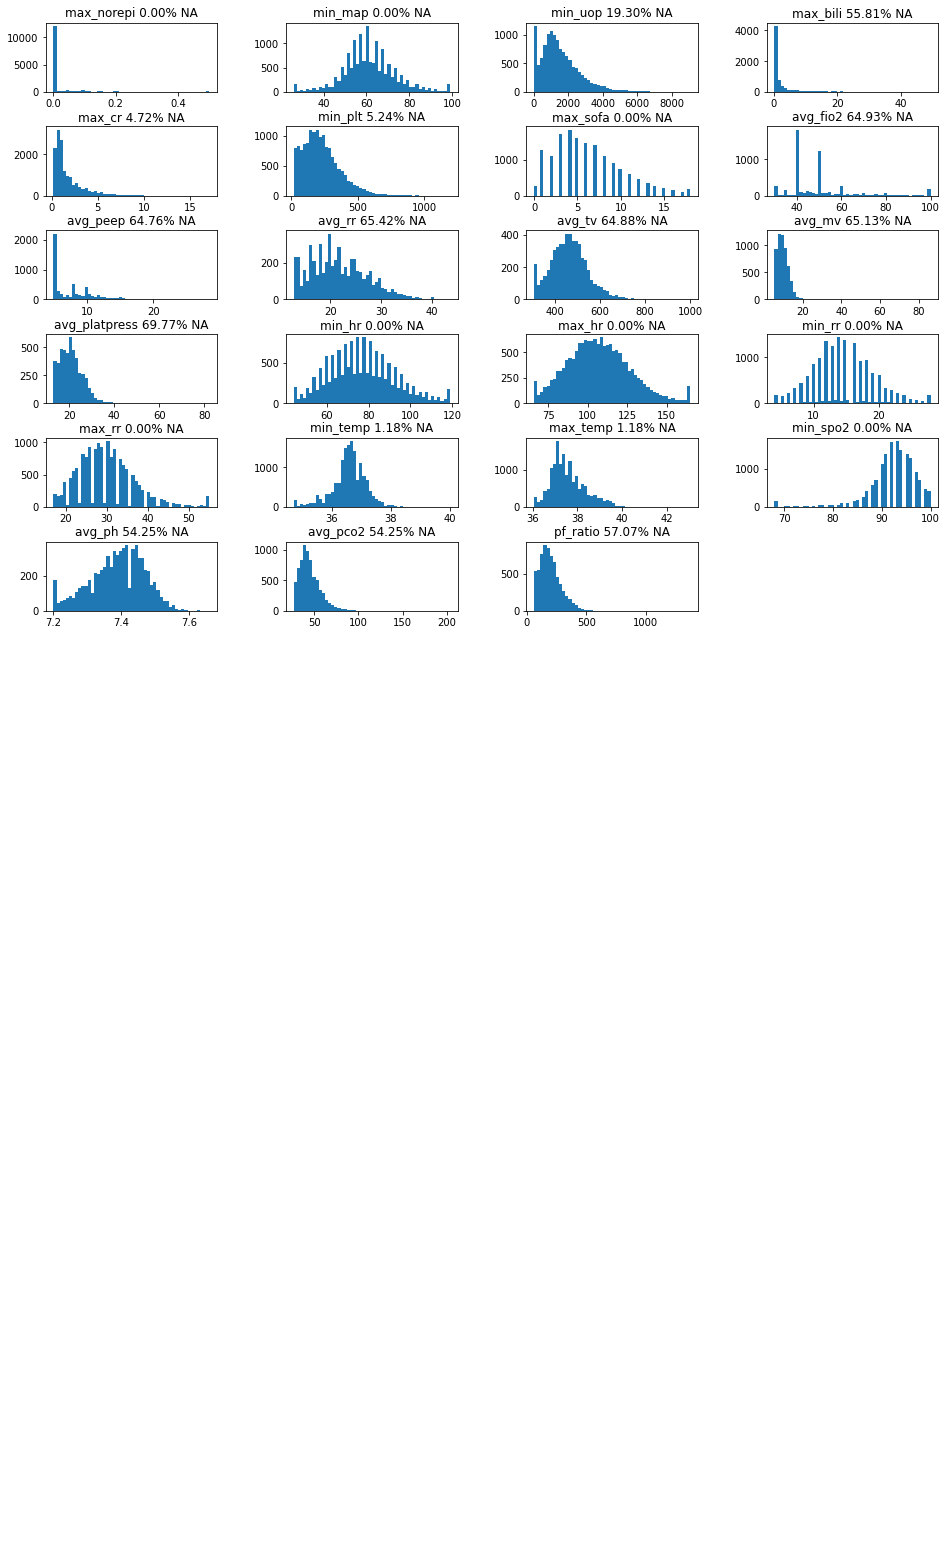

In [38]:
columns = np.array(columns_numbers)
cols = np.pad(columns, (0, 60 - columns.size), constant_values=np.nan).reshape(15, 4)
fig, axes = plt.subplots(
    nrows=cols.shape[0], 
    ncols=cols.shape[1], 
    figsize=(16, 28), 
    gridspec_kw={"wspace": 0.4, "hspace": 0.5}
)
for row in range(axes.shape[0]):
    for col in range(axes.shape[1]):
        column = cols[row, col]
        ax = axes[row, col]
        if isinstance(column, str) and column in data:
            ax.hist(
                data[column], 
                bins=50,
#                 log=True
            )
            ax.set_title(column + f" {data[column].isna().sum() * 100 / data.shape[0]:.2f}% NA")
        else:
            ax.tick_params(
                axis='both', which='both',
                bottom=None, top=None,
                labelbottom=None,
                left=None, right=None,
                labelleft=None
            )
            for i in ["top", "left", "right", "bottom"]:
                ax.spines[i].set_visible(False)

In [39]:
data.to_csv("MIMIC/data_winsorized3-31-22.csv")

# examine correlated

In [42]:
#examine which parameters are correlated with each other 

corr_mtx = data[columns_to_curate].corr()

In [43]:
high_corr = corr_mtx.index[corr_mtx.abs()[corr_mtx.abs() < 1].max() > 0.6]

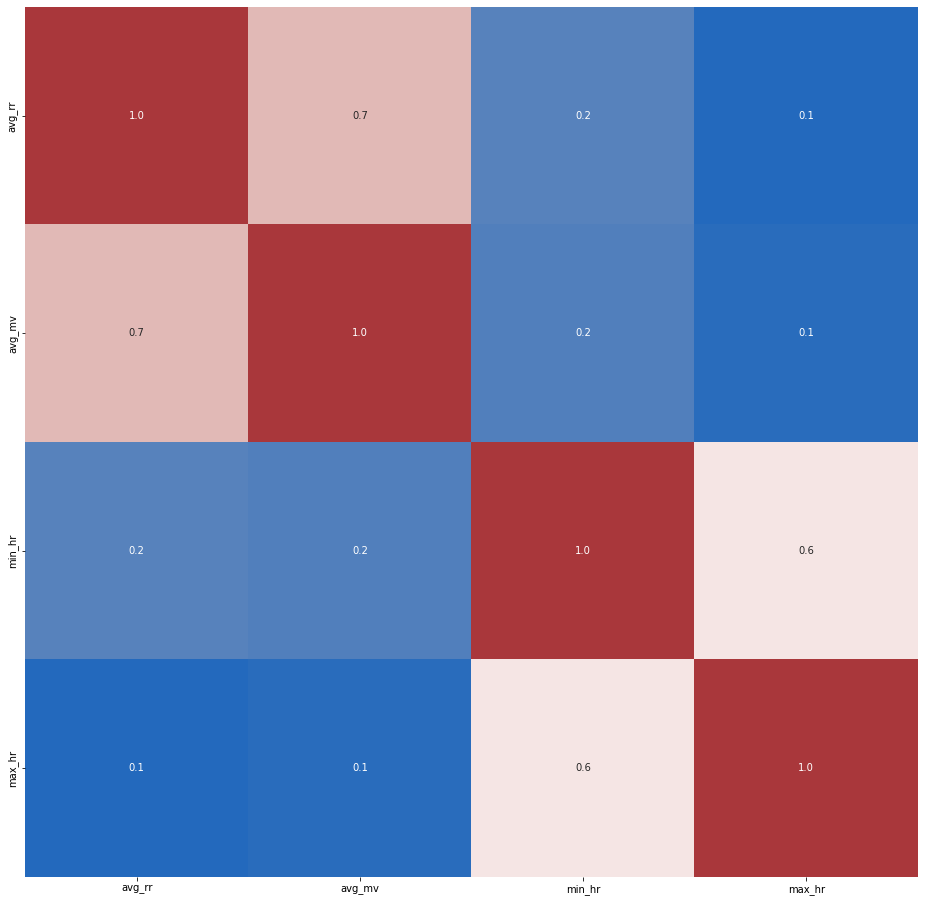

In [44]:
fig, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(
    corr_mtx.loc[high_corr, high_corr], 
    annot=True, 
    cmap='vlag',
    ax=ax,
    cbar=None,
    fmt=".1f"
)

# clustering attempt 1

In [47]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy
import scipy.spatial.distance
import sklearn.metrics
import umap
import pynndescent

In [46]:
!pip install umap-learn

     |████████████████████████████████| 86 kB 3.0 MB/s 
     |████████████████████████████████| 1.1 MB 32.9 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82708 sha256=72add5147210bd5bac7db082787429e8ec67ef84b549824918ba41fba23881fa
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=044468141b083f88590e3d1cc574afe16d9e95a6792aac6bb8aa030c9d39cec6
  Stored in directory: /root/.cache/pip/wheels/03/f1/56/f80d72741e400345b5a5b50ec3d929aca581bf45e0225d5c50
Successfully built umap-learn pynndescent


In [48]:
import umap

In [49]:
data_mtx = data[columns_to_curate]

In [50]:
norm_data = ((data_mtx - np.nanmin(data_mtx, axis=0)) 
             / (np.nanmax(data_mtx, axis=0) - np.nanmin(data_mtx, axis=0)))

In [51]:
scaler = sklearn.preprocessing.StandardScaler()
norm_data_umap = scaler.fit_transform(data_mtx)

In [52]:
data_dist = sklearn.metrics.pairwise.nan_euclidean_distances(norm_data)

In [53]:
data_dist_umap = sklearn.metrics.pairwise.nan_euclidean_distances(norm_data_umap)

In [54]:
data_ward = scipy.cluster.hierarchy.ward(data_dist[np.triu_indices_from(data_dist, k=1)])

In [55]:
data_ward_umap = scipy.cluster.hierarchy.ward(data_dist_umap[np.triu_indices_from(data_dist_umap, k=1)])

In [56]:
clusters = scipy.cluster.hierarchy.cut_tree(data_ward, 12).ravel()

In [57]:
df = pd.DataFrame(dict(
    cluster=clusters
), index=data.index)

In [58]:
df_color = df.apply(
    lambda x: [mpl.colors.rgb2hex(mpl.cm.tab20(int(i))) if not np.isnan(i) else "white" for i in x]
)

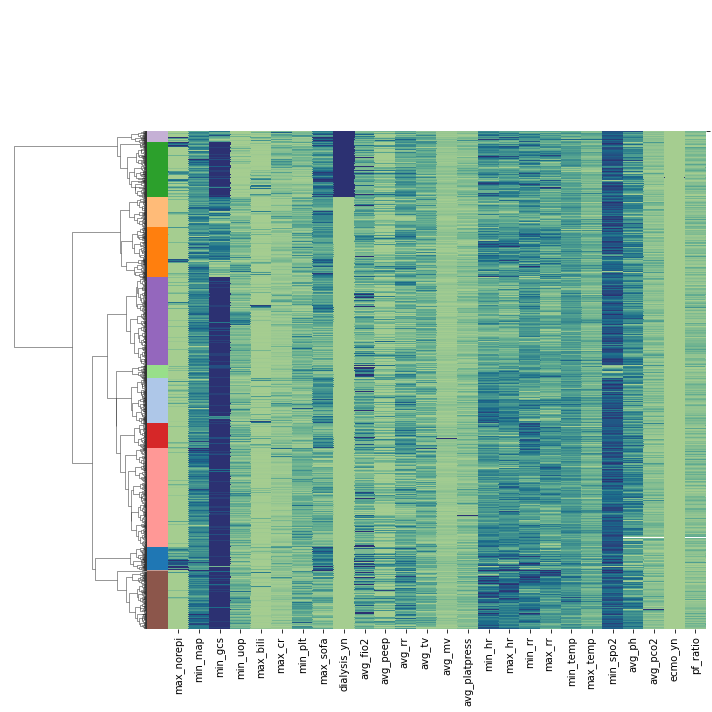

In [59]:
mpl.rcParams["figure.figsize"] = (16, 12)
cg = sns.clustermap(
    norm_data, 
    row_cluster=True,
    row_linkage=data_ward,
    col_cluster=False,
    row_colors=df_color.to_numpy().T,
    yticklabels=[None],
    cmap="crest",
    cbar_pos=None,
)

In [60]:
knn = umap.umap_.nearest_neighbors(
    data_dist_umap, 
    n_neighbors=15, 
    metric="precomputed",
    metric_kwds=None,
    angular=False,
    random_state=42
)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [ ]:
import pynndescent

In [61]:
nndescent = pynndescent.NNDescent(np.zeros((1, 1)))

/usr/local/lib/python3.7/dist-packages/pynndescent/pynndescent_.py:907: UserWarning: Failed to correctly find n_neighbors for some samples.Results may be less than ideal. Try re-running withdifferent parameters.
  "Failed to correctly find n_neighbors for some samples."


In [62]:
knn = (knn[0], knn[1], nndescent)

In [63]:
umap_model = umap.UMAP(
    n_neighbors=15, 
    random_state=42, 
    precomputed_knn=knn,
    metric="precomputed"
)

In [64]:
umap_data = umap_model.fit_transform(data_dist_umap)

/usr/local/lib/python3.7/dist-packages/umap/umap_.py:1780: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")


Text(0.5, 1.0, 'UMAP MIMIC dataset')

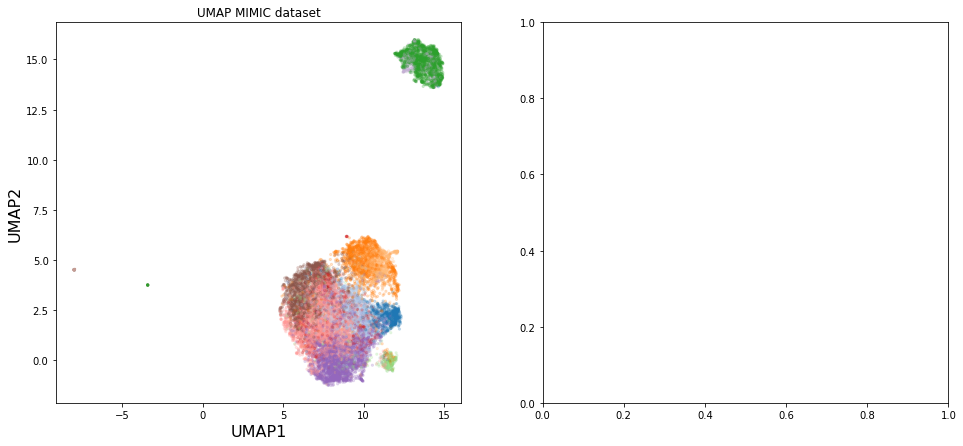

In [65]:
fig, axes = plt.subplots(figsize=(16, 7), ncols=2)
scatter = axes[0].scatter(
    umap_data[:, 0], 
    umap_data[:, 1], 
    s=5, 
    c=[mpl.cm.tab20(i) for i in df.cluster.astype(int)],
    alpha=0.2
)
axes[0].set_xlabel("UMAP1", size=16)
axes[0].set_ylabel("UMAP2", size=16)
axes[0].set_title("UMAP MIMIC dataset")

# clustering attempt 2 minus ecmo

In [ ]:
columns_to_curate2 = [
    'max_norepi', 'min_map', 'min_gcs', 'min_uop', 'max_bili', 'max_cr',
       'min_plt', 'max_sofa', 'dialysis_yn', 'avg_fio2', 'avg_peep', 'avg_rr',
       'avg_tv', 'avg_mv', 'avg_platpress', 'min_hr', 'max_hr', 'min_rr',
       'max_rr', 'min_temp', 'max_temp', 'min_spo2', 'avg_ph', 'avg_pco2',
       'pf_ratio'
]

In [ ]:
data_mtx = data[columns_to_curate2]

In [ ]:
norm_data = ((data_mtx - np.nanmin(data_mtx, axis=0)) 
             / (np.nanmax(data_mtx, axis=0) - np.nanmin(data_mtx, axis=0)))

In [ ]:
scaler = sklearn.preprocessing.StandardScaler()
norm_data_umap = scaler.fit_transform(data_mtx)

In [ ]:
data_dist = sklearn.metrics.pairwise.nan_euclidean_distances(norm_data)

In [ ]:
data_dist_umap = sklearn.metrics.pairwise.nan_euclidean_distances(norm_data_umap)

In [ ]:
data_ward = scipy.cluster.hierarchy.ward(data_dist[np.triu_indices_from(data_dist, k=1)])

In [ ]:
data_ward_umap = scipy.cluster.hierarchy.ward(data_dist_umap[np.triu_indices_from(data_dist_umap, k=1)])

In [ ]:
clusters = scipy.cluster.hierarchy.cut_tree(data_ward, 6).ravel()

In [ ]:
df = pd.DataFrame(dict(
    cluster=clusters
), index=data.index)

In [ ]:
df_color = df.apply(
    lambda x: [mpl.colors.rgb2hex(mpl.cm.tab20(int(i))) if not np.isnan(i) else "white" for i in x]
)

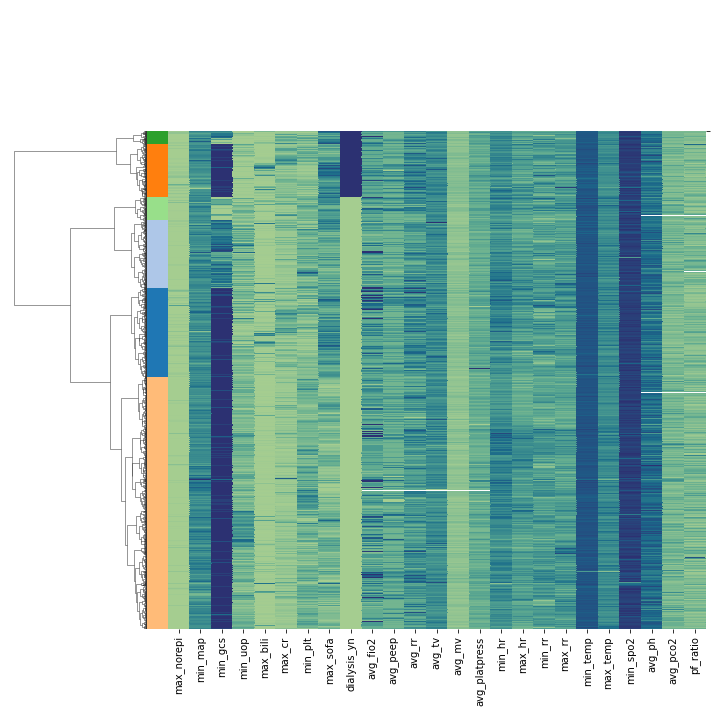

In [ ]:
mpl.rcParams["figure.figsize"] = (16, 12)
cg = sns.clustermap(
    norm_data, 
    row_cluster=True,
    row_linkage=data_ward,
    col_cluster=False,
    row_colors=df_color.to_numpy().T,
    yticklabels=[None],
    cmap="crest",
    cbar_pos=None,
)

In [ ]:
knn = umap.umap_.nearest_neighbors(
    data_dist_umap, 
    n_neighbors=15, 
    metric="precomputed",
    metric_kwds=None,
    angular=False,
    random_state=42
)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [ ]:
nndescent = pynndescent.NNDescent(np.zeros((1, 1)))

/usr/local/lib/python3.7/dist-packages/pynndescent/pynndescent_.py:907: UserWarning: Failed to correctly find n_neighbors for some samples.Results may be less than ideal. Try re-running withdifferent parameters.
  "Failed to correctly find n_neighbors for some samples."


In [ ]:
knn = (knn[0], knn[1], nndescent)

In [ ]:
umap_model = umap.UMAP(
    n_neighbors=15, 
    random_state=42, 
    precomputed_knn=knn,
    metric="precomputed"
)

In [ ]:
umap_data = umap_model.fit_transform(data_dist_umap)

/usr/local/lib/python3.7/dist-packages/umap/umap_.py:1780: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")


Text(0.5, 1.0, 'UMAP MIMIC dataset v2')

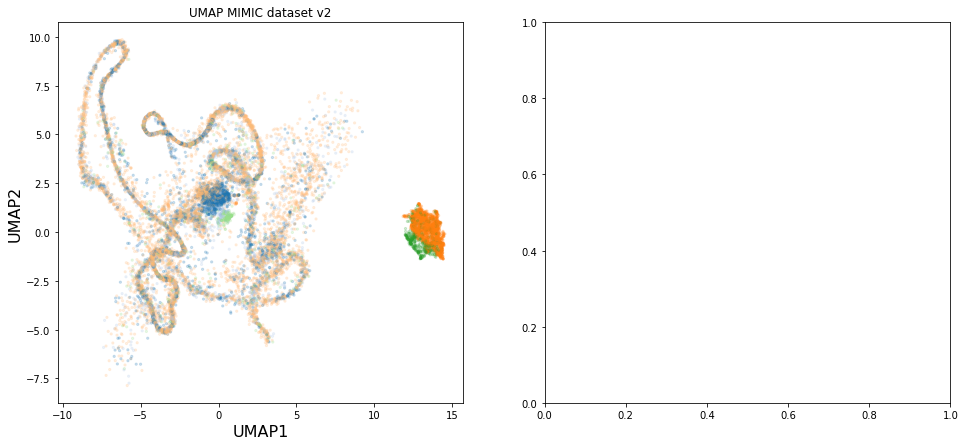

In [ ]:
fig, axes = plt.subplots(figsize=(16, 7), ncols=2)
scatter = axes[0].scatter(
    umap_data[:, 0], 
    umap_data[:, 1], 
    s=5, 
    c=[mpl.cm.tab20(i) for i in df.cluster.astype(int)],
    alpha=0.2
)
axes[0].set_xlabel("UMAP1", size=16)
axes[0].set_ylabel("UMAP2", size=16)
axes[0].set_title("UMAP MIMIC dataset v2")